In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit



@njit
def generer_tableau(ratio,size):
    nb = int(size*size*ratio)
    a = np.zeros(size*size)
    arr = np.arange(size*size)
    np.random.shuffle(arr)
    a[arr[:nb]]=1
    return a.reshape((size, size))


import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange

@njit
def generer_tableau(ratio, size):
    nb = int(size * size * ratio)
    a = np.zeros(size * size)
    arr = np.arange(size * size)
    np.random.shuffle(arr)
    a[arr[:nb]] = 1
    return a.reshape((size, size))


@njit
def calcul_DE(tableau, x, y, size):
    if x == 0 or x == size - 1 or y == 0 or y == size - 1:
        extended_tab = np.zeros((size + 2, size + 2))
        extended_tab[1:size + 1, 1:size + 1] = tableau
        extended_tab[0, 1:size + 1] = tableau[-1]
        extended_tab[-1, 1:size + 1] = tableau[0]
        extended_tab[1:size + 1, 0] = tableau[:, size - 1]
        extended_tab[1:size + 1, size + 1] = tableau[:, 0]
        table_locale = extended_tab[x:x + 3, y:y + 3]
        o = table_locale[1, 1] * 2 - 1
        a = table_locale[0, 1] * 2 - 1
        b = table_locale[1, 0] * 2 - 1
        c = table_locale[1, 2] * 2 - 1
        d = table_locale[2, 1] * 2 - 1
    else:
        table_locale = tableau[x - 1:x + 2, y - 1:y + 2]
        o = table_locale[1, 1] * 2 - 1
        a = table_locale[0, 1] * 2 - 1
        b = table_locale[1, 0] * 2 - 1
        c = table_locale[1, 2] * 2 - 1
        d = table_locale[2, 1] * 2 - 1
    return 2 * o * (a + b + c + d)


@njit
def new_point_parallel(tableau, size, exp_values,nb_pas):
    for _ in prange(size * size * nb_pas):
        coordx = np.random.randint(size)
        coordy = np.random.randint(size)
        DE = calcul_DE(tableau, coordx, coordy, size)
        if test_precomputed(DE, exp_values):
            tableau[coordx, coordy] = not tableau[coordx, coordy]
    return tableau


@njit
def precomputed_exp_values(T):
    return np.array([np.exp(-4 / T), np.exp(-8 / T)])


@njit
def test_precomputed(DE, exp_values):
    if DE == 0 or DE == -4 or DE == -8:
        return True
    if DE == 4 or DE == 8:
        x = np.random.rand()
        return x < exp_values[int(DE / 4 - 1)]
    else:
        print("erreur, DE = ", DE)
        return False



@njit
def M(tableau, size):
    totplus = np.sum(tableau)

    return abs(-1 * (size * size - totplus) + totplus) / (size * size)


0.250
0.300
0.350
0.400
0.450
0.500
0.550
0.600
0.650
0.700
0.750
0.800
0.850
0.900
0.950
1.000
1.050
1.100
1.150
1.200
1.250
1.300
1.350
1.400
1.450
1.500
1.550
1.600
1.650
1.700
1.750
1.800
1.850
1.900
1.950
2.000
2.050
2.100
2.150
2.200
2.250
2.300
2.350
2.400
2.450
2.500
2.550
2.600
2.650
2.700
2.750
2.800
2.850
2.900
2.950
3.000
3.050
3.100
3.150
3.200
3.250
3.300
3.350
3.400
3.450
3.500
3.550
3.600
3.650
3.700
3.750
3.800
3.850
3.900
3.950
4.000
4.050
4.100
4.150
4.200
4.250


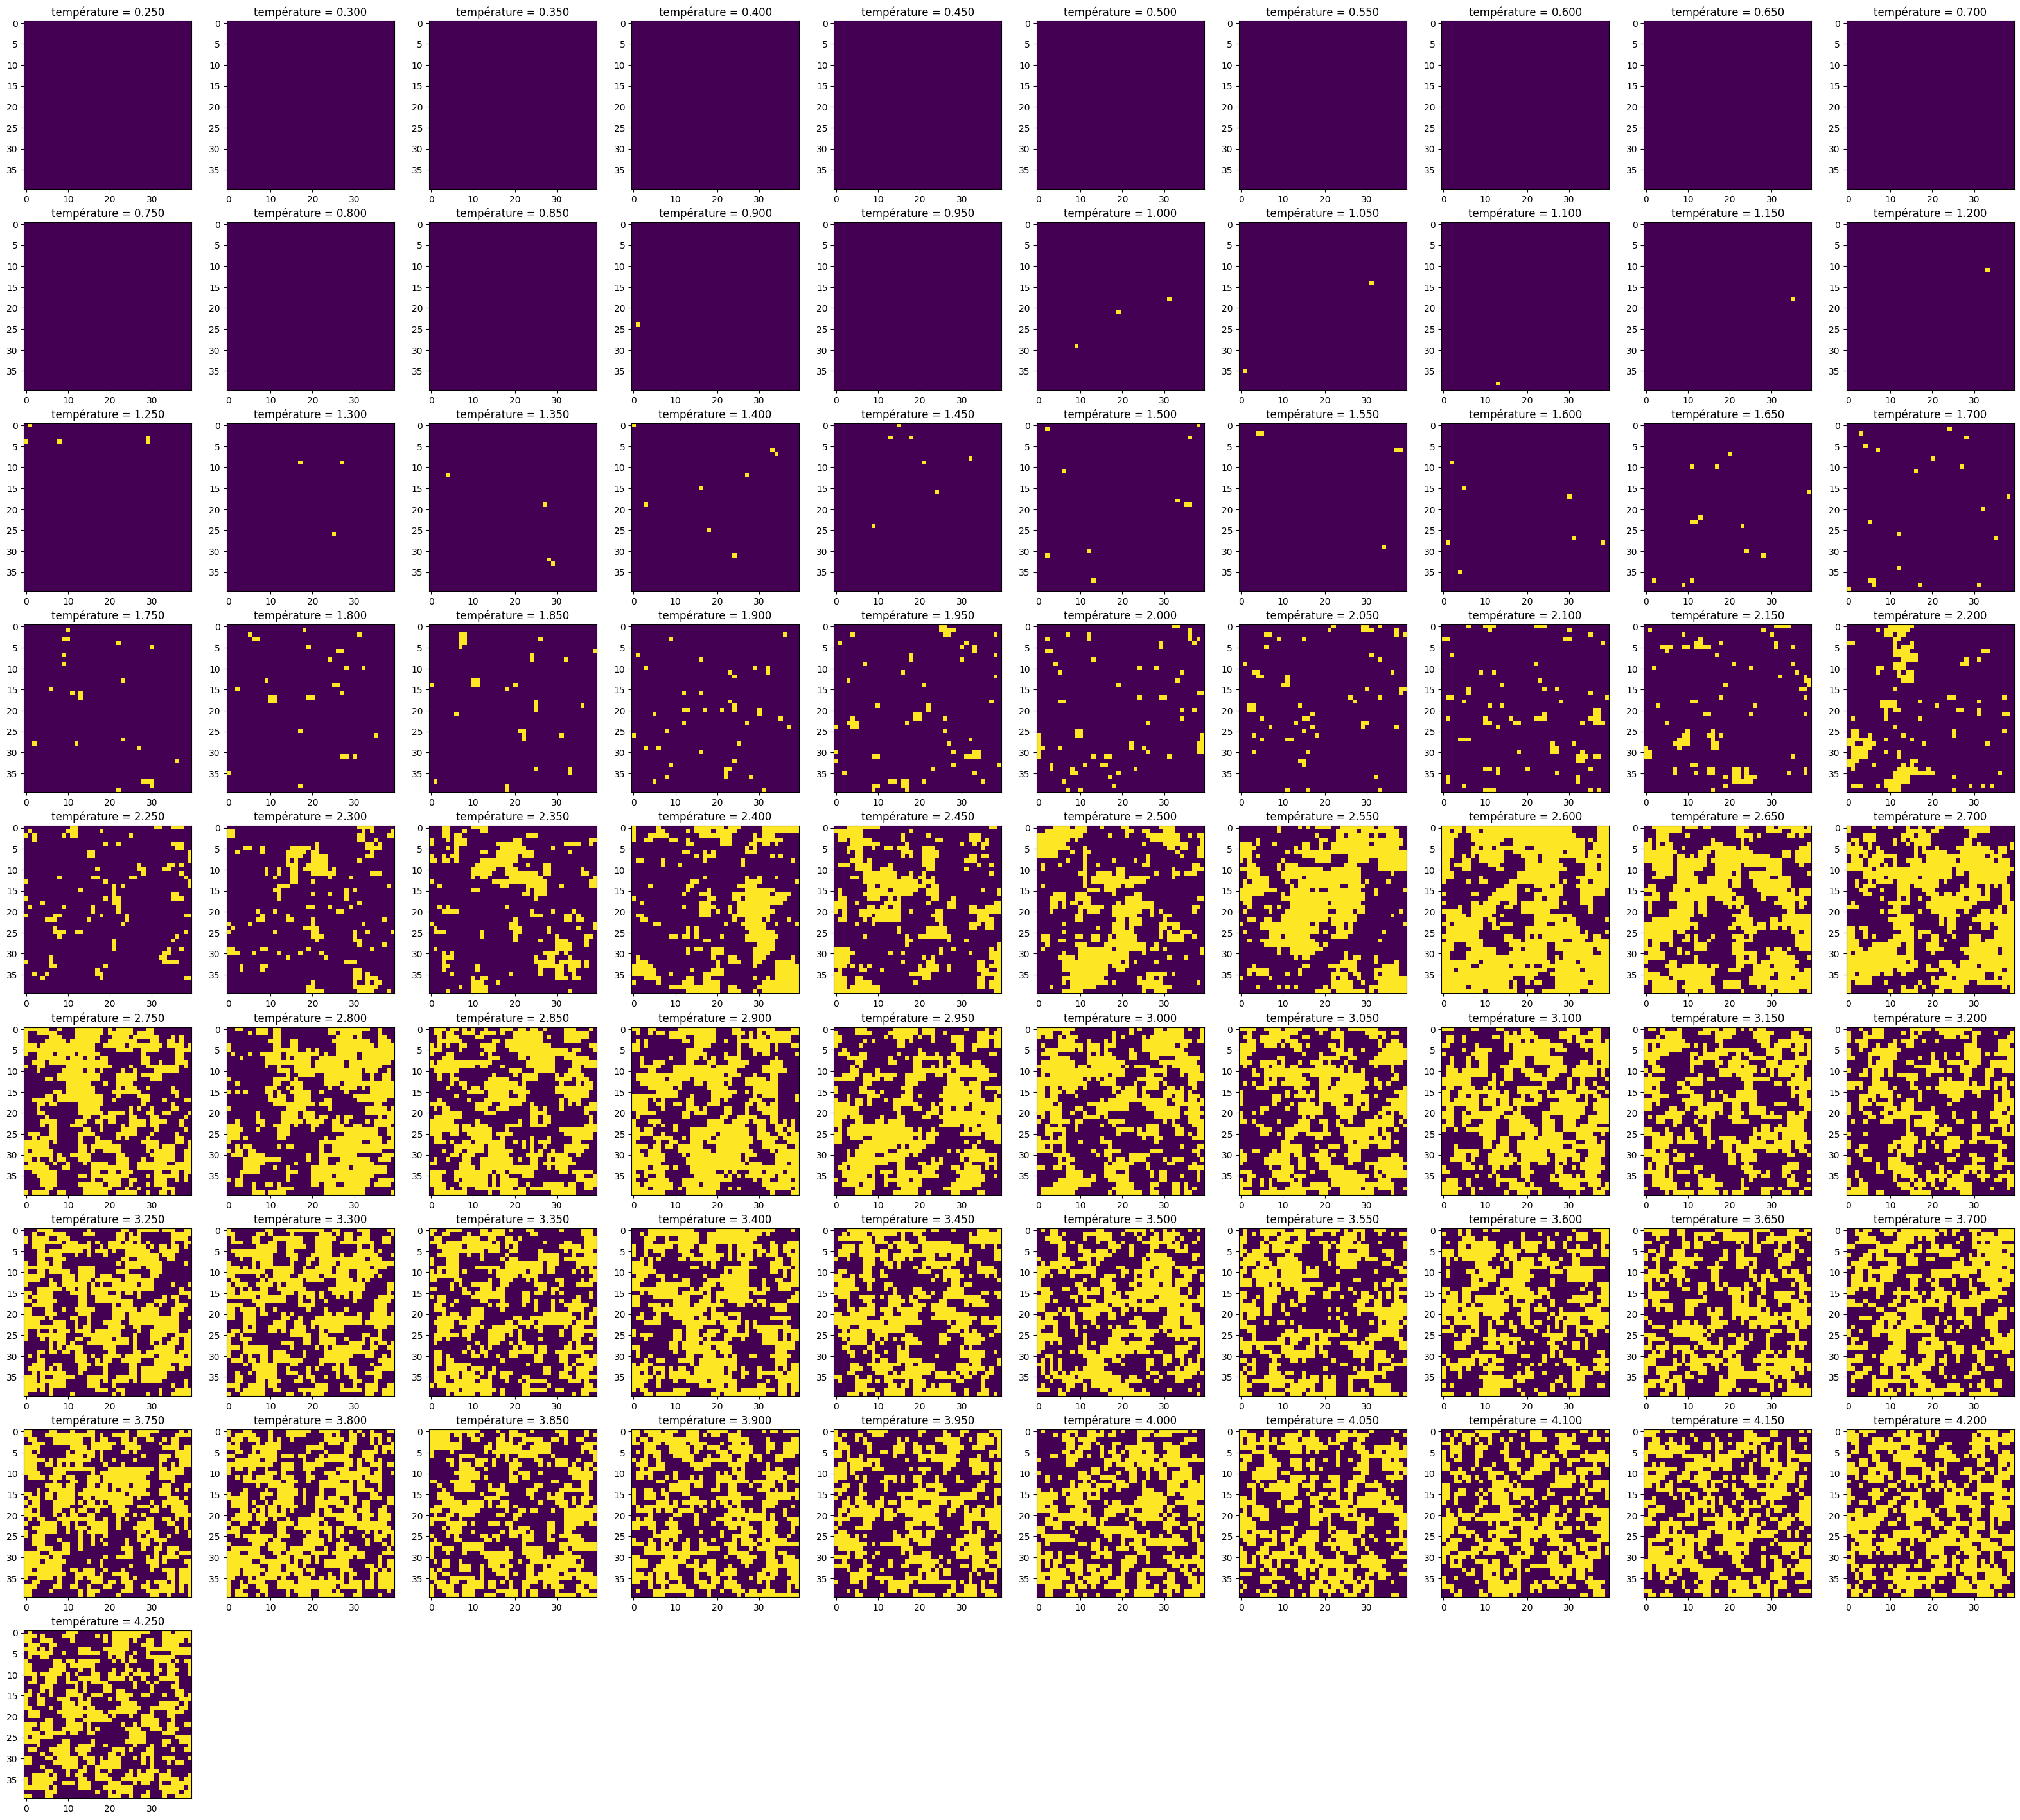

In [49]:
ratio_cases = 0.25

size = 40

tab = generer_tableau(ratio_cases, size)

nb_pas = 300 # un pas correspond à 1600 tentatives d'ajouts de nouveaux points
nb_data = 50

T_liste = np.linspace(0.25, 4.25,81)


Mliste=[]
plt.figure(figsize=[40,40])

for i,T in enumerate(T_liste):
    temperature= "{:.3f}".format(T)
    print(temperature)
    exp_values = precomputed_exp_values(T)
    for dat in range(nb_data):
        tab = generer_tableau(ratio_cases, size)
        tab = new_point_parallel(tab, size, exp_values,nb_pas)
        Mliste.append(np.sum(tab))
    plt.subplot(10,10,i+1)
    plt.imshow(tab)
    plt.title('température = {:.3f}'.format(T))

plt.savefig('nouvelle_data_controle.jpg',dpi =300)
plt.show()

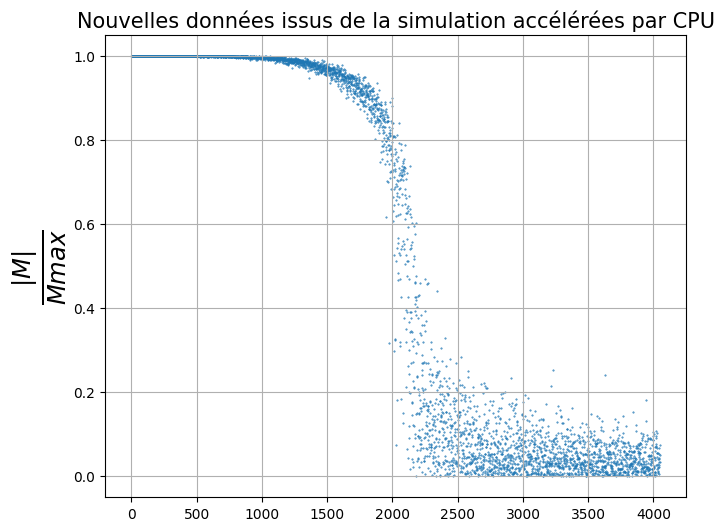

In [50]:
Mliste = (np.abs(np.array(Mliste)-800)*2)/1600

np.save('new_data_accelerated.npy',Mliste)
plt.figure(figsize=[7.5,6])
plt.scatter(np.arange(len(Mliste)),Mliste,s=0.2)
plt.ylabel(r'$\frac{|M|}{Mmax}$',size = 25)
plt.grid()
plt.title("Nouvelles données issus de la simulation accélérées par CPU",size = 15)
plt.savefig('new_data_accelerated.jpg',dpi =300)


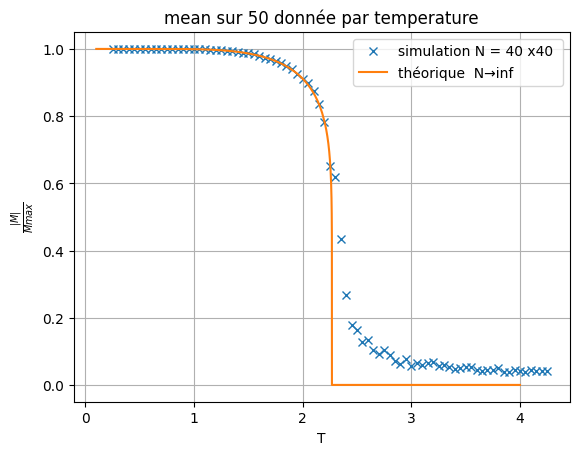

In [58]:
plt.plot(T_liste,Mliste.reshape(len(T_liste),nb_data).mean(axis=1),'x',label = "simulation N = 40 x40 ")

T = np.concatenate((np.linspace(0.1,2.2,100),np.linspace(2.2,2.26918478,100)))
x = (1-1/(np.sinh(2/T))**4)**(1/8)
plt.plot(list(T)+[2.269,3,3.5,3.7,4],list(x)+[0,0,0,0,0],label ="théorique  N→inf")


plt.xlabel('T')
plt.ylabel(r'$\frac{|M|}{Mmax}$')
plt.legend()
plt.grid()
plt.title('mean sur {} donnée par temperature'.format(nb_data))
plt.savefig('data_mean.jpg',dpi=300)
plt.show()